# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, Dense, Input, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### 데이터 로드 및 전처리

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
print(y_test[5])

[6]


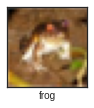

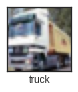

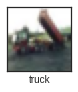

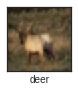

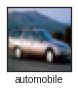

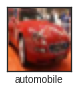

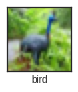

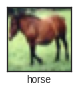

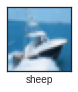

In [ ]:
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_full[i])
  plt.xlabel(class_names[int(y_train_full[i])])

  plt.show()

In [ ]:
x_mean = np.mean(x_train_full, axis=(0, 1, 2))
x_std = np.std(x_train_full, axis=(0, 1 ,2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(35000, 32, 32, 3)
(35000, 1)
(10000, 32, 32, 3)
(10000, 1)
(15000, 32, 32, 3)
(15000, 1)


### 모델 구성 및 컴파일


In [ ]:
def model_build():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  
  output = Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  
  output = Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  
  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model


  

In [ ]:
model = model_build()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Epoch 1/30
137/137 [==============================] - 2s 14ms/step - loss: 1.8895 - acc: 0.3228 - val_loss: 1.6493 - val_acc: 0.4073
Epoch 2/30
137/137 [==============================] - 2s 11ms/step - loss: 1.5241 - acc: 0.4592 - val_loss: 1.4445 - val_acc: 0.4890
Epoch 3/30
137/137 [==============================] - 1s 11ms/step - loss: 1.3859 - acc: 0.5119 - val_loss: 1.3784 - val_acc: 0.5043
Epoch 4/30
137/137 [==============================] - 2s 11ms/step - loss: 1.2980 - acc: 0.5437 - val_loss: 1.2699 - val_acc: 0.5515
Epoch 5/30
137/137 [==============================] - 2s 11ms/step - loss: 1.2337 - acc: 0.5692 - val_loss: 1.2415 - val_acc: 0.5609
Epoch 6/30
137/137 [==============================] - 2s 11ms/step - loss: 1.1878 - acc: 0.5841 - val_loss: 1.1875 - val_acc: 0.5777
Epoch 7/30
137/137 [==============================] - 2s 11ms/step - loss: 1.1405 - acc: 0.6010 - val_loss: 1.1621 - val_acc: 0.5912
Epoch 8/30
137/137 [==============================] - 2s 11ms/step - 

### 학습 과정 시각화

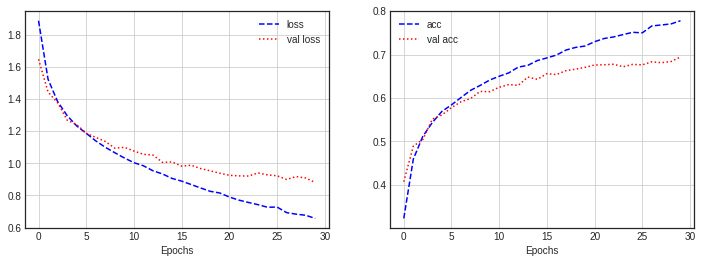

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'b--', label='acc')
plt.plot(history.history['val_acc'], 'r:', label='val acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지하는 기술 필요

In [ ]:
def model_build2():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  
  output = Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  
  output = Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
  output = Dropout(0.5)(output)
  
  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model  

In [ ]:
model = model_build2()
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Epoch 1/100
137/137 [==============================] - 2s 15ms/step - loss: 0.9563 - acc: 0.6575 - val_loss: 0.8930 - val_acc: 0.6947
Epoch 2/100
137/137 [==============================] - 2s 14ms/step - loss: 0.9473 - acc: 0.6623 - val_loss: 0.8866 - val_acc: 0.6951
Epoch 3/100
137/137 [==============================] - 2s 14ms/step - loss: 0.9320 - acc: 0.6678 - val_loss: 0.8759 - val_acc: 0.6994
Epoch 4/100
137/137 [==============================] - 2s 14ms/step - loss: 0.9150 - acc: 0.6748 - val_loss: 0.8656 - val_acc: 0.7016
Epoch 5/100
137/137 [==============================] - 2s 14ms/step - loss: 0.9130 - acc: 0.6749 - val_loss: 0.8625 - val_acc: 0.6987
Epoch 6/100
137/137 [==============================] - 2s 14ms/step - loss: 0.9004 - acc: 0.6772 - val_loss: 0.8544 - val_acc: 0.7049
Epoch 7/100
137/137 [==============================] - 2s 14ms/step - loss: 0.8837 - acc: 0.6824 - val_loss: 0.8450 - val_acc: 0.7091
Epoch 8/100
137/137 [==============================] - 2s 14ms

### 학습 과정 시각화

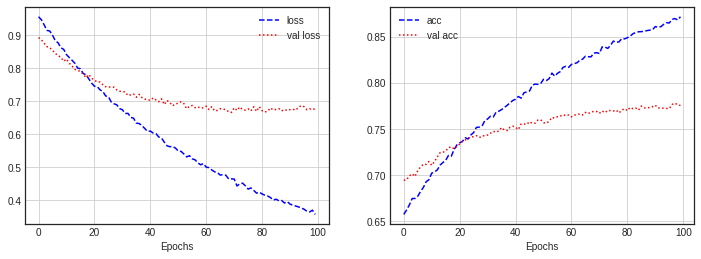

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'b--', label='acc')
plt.plot(history.history['val_acc'], 'r:', label='val acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()